In [ ]:
# This code uses https://www.kaggle.com/code/electrichands/spotify-similarity-based/notebook, licensed under Apache License 2.0.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-spotify-tracks-dataset/dataset.csv


## Data Loading

In [2]:
import pandas

df = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv', index_col=0)

In [3]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

### Check Missing Values

In [5]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
import pandas as pd

# Assuming df is your DataFrame and 'track_id' is the column containing track IDs
num_duplicates = df.duplicated('track_id').sum()
print("Number of duplicate track IDs:", num_duplicates)

# Drop rows with duplicate track IDs
df.drop_duplicates('track_id', inplace=True)

# Confirm that duplicates have been dropped
print("Number of unique track IDs after dropping duplicates:", len(df))

Number of duplicate track IDs: 24259
Number of unique track IDs after dropping duplicates: 89740


In [9]:
df.shape

(89740, 20)

In [10]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89740.000000,8.974000e+04,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,33.198808,2.291444e+05,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426
std,20.580640,1.129458e+05,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.730400e+05,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000
50%,33.000000,2.132955e+05,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000
75%,49.000000,2.642930e+05,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
from scipy import stats

# Define a function to find outliers using Z-score
def find_outliers(dataframe, column_name):
    # Calculate Z-scores
    z_scores = stats.zscore(dataframe[column_name])
    # Define a threshold for identifying outliers
    threshold = 3
    # Get boolean array of outliers
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    # Return the dataframe of outliers
    return dataframe[outliers]

# Find outliers for each numerical column in the dataset
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
outliers_dict = {}

for column in numerical_columns:
    outliers_dict[column] = find_outliers(df, column)

# Print the number of outliers for each column
for column, outliers_df in outliers_dict.items():
    print(f"{column} has {len(outliers_df)} outliers.")

popularity has 11 outliers.
duration_ms has 732 outliers.
danceability has 157 outliers.
energy has 0 outliers.
loudness has 1967 outliers.
speechiness has 1633 outliers.
acousticness has 0 outliers.
instrumentalness has 0 outliers.
liveness has 2856 outliers.
valence has 0 outliers.
tempo has 186 outliers.


In [12]:
new_df = df.copy()

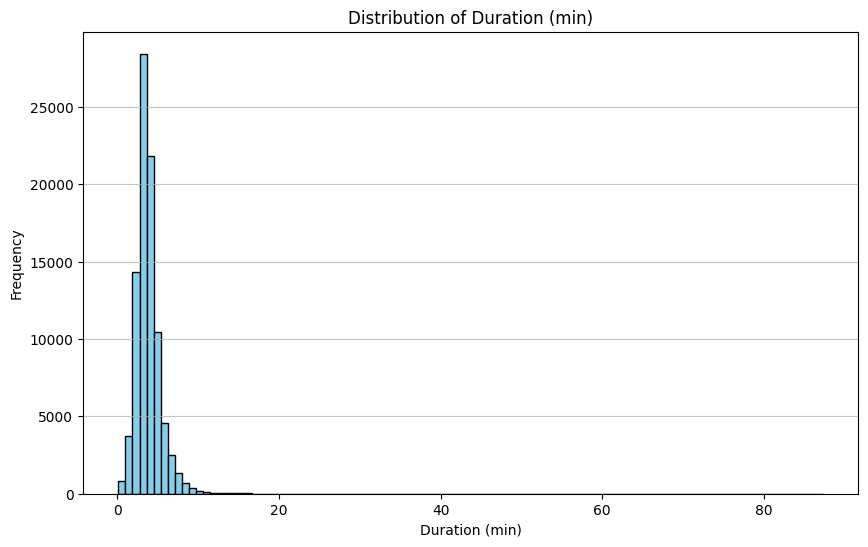

In [13]:
import matplotlib.pyplot as plt

# Convert duration_ms to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Plot the distribution of duration_min
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (min)')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
import numpy as np

# Define the bin edges for the intervals
bin_edges = np.arange(0, df['duration_min'].max() + 5, 5)

# Use cut to create bins
df['duration_interval'] = pd.cut(df['duration_min'], bins=bin_edges)

# Create a histogram dataframe
histogram_df = df['duration_interval'].value_counts().sort_index().reset_index()
histogram_df.columns = ['Duration Interval (min)', 'Frequency']

# Print the histogram dataframe
display(histogram_df)

,Duration Interval (min),Frequency
0,"(0.0, 5.0]",76174
1,"(5.0, 10.0]",13016
2,"(10.0, 15.0]",409
3,"(15.0, 20.0]",68
4,"(20.0, 25.0]",28
5,"(25.0, 30.0]",11
6,"(30.0, 35.0]",5
7,"(35.0, 40.0]",3
8,"(40.0, 45.0]",3
9,"(45.0, 50.0]",6


In [15]:
# Filter songs with duration over 10 minutes or below 1 minute
duration_outliers = df[(df['duration_min'] > 12) | (df['duration_min'] < 0.5)]

# Print the songs with duration over 10 minutes or below 1 minute
display(duration_outliers[['track_name', 'artists', 'album_name', 'track_genre', 'duration_min']])

,track_name,artists,album_name,track_genre,duration_min
1505,Zombie,Fela Kuti,Zombie,afrobeat,12.427550
1688,Lady,Fela Kuti,The Best of the Black President,afrobeat,13.809767
1836,When The Going Is Smooth & Good,William Onyeabor,Anything You Sow,afrobeat,12.896667
1902,Expensive Shit,Fela Kuti;Afrika 70,Expensive Shit,afrobeat,13.220000
1980,Shuffering and Shmiling,Fela Kuti,The Best of the Black President,afrobeat,12.423100
...,...,...,...,...,...
111833,Finding It So Hard,Archive,You All Look the Same to Me,trip-hop,15.554433
111849,A Huge Ever Growing Pulsating Brain That Rules...,The Orb;Alex Paterson,Adventures Beyond The Ultraworld,trip-hop,18.810000
113390,Cantos Gregorianos Sanadores,Mc_team,Música Relajante Para Calmar La Mente,world-music,24.299967
113688,Ruido Rosa Puro - Una Hora Versión,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,world-music,60.028217


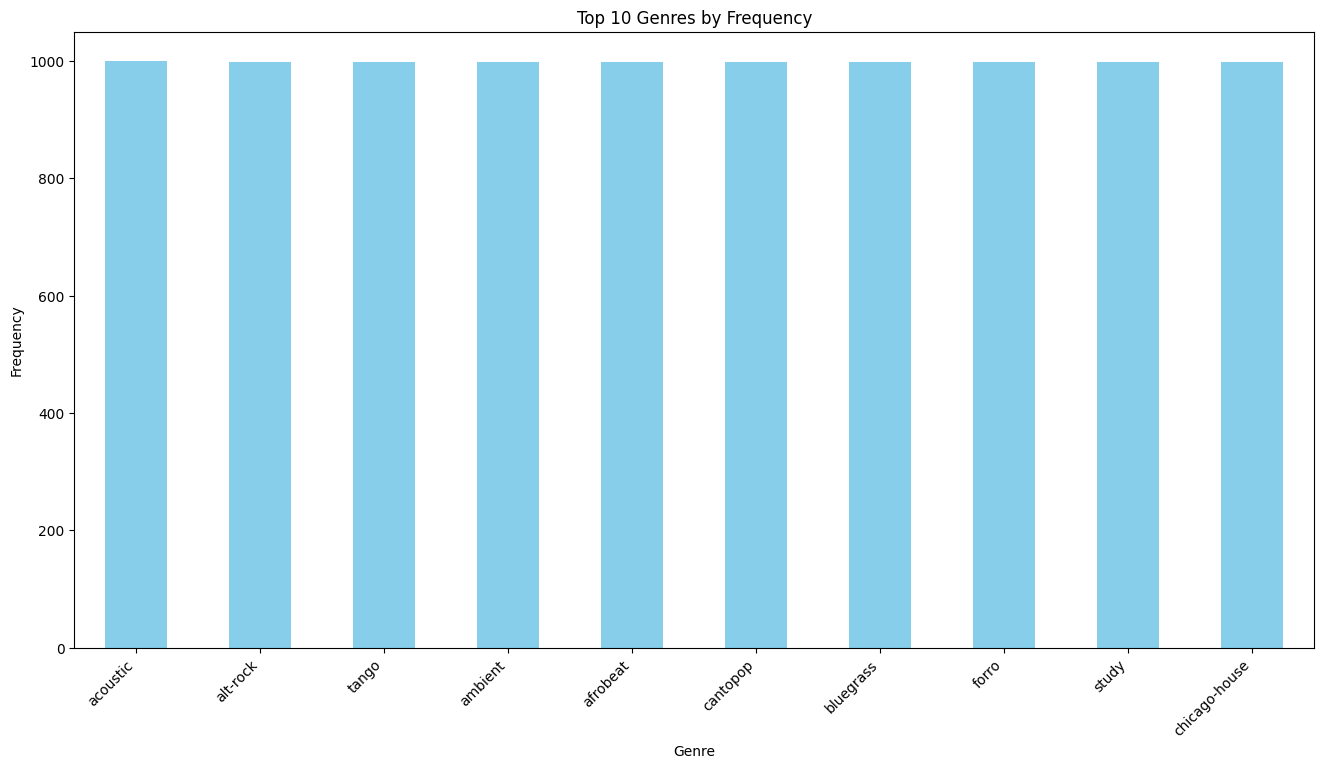

In [16]:
import matplotlib.pyplot as plt

# Get the top 10 genres by frequency
top_genres = df['track_genre'].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(16, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Top 10 Genres by Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   track_id           89740 non-null  object  
 1   artists            89740 non-null  object  
 2   album_name         89740 non-null  object  
 3   track_name         89740 non-null  object  
 4   popularity         89740 non-null  int64   
 5   duration_ms        89740 non-null  int64   
 6   explicit           89740 non-null  bool    
 7   danceability       89740 non-null  float64 
 8   energy             89740 non-null  float64 
 9   key                89740 non-null  int64   
 10  loudness           89740 non-null  float64 
 11  mode               89740 non-null  int64   
 12  speechiness        89740 non-null  float64 
 13  acousticness       89740 non-null  float64 
 14  instrumentalness   89740 non-null  float64 
 15  liveness           89740 non-null  float64 
 16  valence 

### Features Engineering

In [18]:
!pip install fasttext

In [19]:
import fasttext

# Combine the text columns into a single string for each row and save to a text file
text_data = df['artists'] + ' ' + df['track_name'] + ' ' + df['album_name'] + ' ' + df['track_genre']
text_data.to_csv('text_data.txt', index=False, header=False)

# Train the fastText model on the text data
model = fasttext.train_unsupervised('text_data.txt', model='skipgram')

Read 0M words
Number of words:  20486
Number of labels: 0
Progress: 100.0% words/sec/thread:   40410 lr:  0.000000 avg.loss:  1.586695 ETA:   0h 0m 0s


In [20]:
def get_mean_embedding(words_list, model):
    embeddings = [model.get_word_vector(word) for word in words_list]
    mean_embedding = np.mean(embeddings, axis=0)
    return mean_embedding

# Function to handle multiple artists and get their mean embedding
def get_artists_embedding(artists, model):
    # Split the artists string into individual artists
    artists_list = artists.split(';')
    # Get the mean embedding for the list of artists
    return get_mean_embedding(artists_list, model)

In [21]:
from sklearn.preprocessing import StandardScaler

def get_track_embedding(track, model):
    # Get the embeddings as before
    artists_embedding = get_artists_embedding(track['artists'], model)
    track_name_embedding = get_mean_embedding(track['track_name'].split(), model)
    album_name_embedding = get_mean_embedding(track['album_name'].split(), model)
    track_genre_embedding = get_mean_embedding(track['track_genre'].split(), model)

    # Get the numerical features
    numerical_features = np.array([track['popularity'], track['duration_ms'], track['danceability'], track['loudness'], track['energy'], track['speechiness'], track['instrumentalness'], track['liveness'], track['valence'], track['tempo']])
    

    # Normalize the numerical features to have the same scale as the embeddings
    # This step is important to ensure that the numerical features do not dominate the embeddings
    scaler = StandardScaler()
    normalized_numerical_features = scaler.fit_transform(numerical_features.reshape(-1, 1))

    # Flatten the normalized numerical features to 1D
    normalized_numerical_features = normalized_numerical_features.flatten()

    # Concatenate the embeddings and the numerical features
    final_embedding = artists_embedding + track_name_embedding + album_name_embedding + track_genre_embedding
    final_embedding = np.concatenate([final_embedding, normalized_numerical_features])

    return final_embedding

In [22]:
# Calculate embeddings for all tracks
df['embedding'] = df.apply(lambda x: get_track_embedding(x, model), axis=1)

In [23]:
len(df['embedding'][0])

110

In [24]:
from annoy import AnnoyIndex

# Assuming the dimension of your embeddings is 128
t = AnnoyIndex(len(df['embedding'][0]), 'angular')  

# Build the Annoy index
for i, row in df.iterrows():
    t.add_item(i, row['embedding'])

# Build the index, 10 trees are being used in this example
t.build(10)

True

In [25]:
df[df['artists'].str.contains('BLACK')]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_interval,embedding
20462,13hvHEstJ4sNbzdroPrPI3,Dua Lipa;BLACKPINK,Dua Lipa (Complete Edition),Kiss and Make Up,59,190560,False,0.675,0.729,8,...,0.05570,0.000000,0.1890,0.630,99.986,4,dance,3.176000,"(0.0, 5.0]","[-0.7399092316627502, 0.4943411350250244, 0.56..."
21372,0Xoj0t3aqkviPAomSMjrXs,Myssa More;BLACKGRAPES,Tick an Tock,Tick an Tock,33,185260,False,0.835,0.400,8,...,0.09380,0.067900,0.1030,0.523,103.657,4,dancehall,3.087667,"(0.0, 5.0]","[-0.390157550573349, 1.4122482538223267, 0.096..."
65013,7EyhPjrJzjx0fk2i7vUJCS,BLACKPINK,Pink Venom,Pink Venom,85,186964,False,0.794,0.719,0,...,0.01190,0.000000,0.2760,0.690,90.016,4,k-pop,3.116067,"(0.0, 5.0]","[0.6428433656692505, -1.3818964958190918, 0.53..."
65015,3BHR1mJOqn2UZyq98YKPgd,BLACKPINK,BORN PINK,Typa Girl,82,179172,True,0.918,0.585,7,...,0.06270,0.000000,0.6240,0.519,131.966,4,k-pop,2.986200,"(0.0, 5.0]","[0.4201085567474365, -1.1071395874023438, 0.89..."
65016,1I2MEjnS9c4OPMnKWbIuYs,BLACKPINK,BORN PINK,Hard to Love,80,162569,True,0.647,0.723,5,...,0.00503,0.000000,0.1760,0.443,105.001,4,k-pop,2.709483,"(0.0, 5.0]","[0.1990181803703308, -0.777794599533081, 1.159..."
65017,6bvZRLLkBKkmgpBJTTj3QK,BLACKPINK,THE ALBUM,How You Like That,75,180956,False,0.813,0.787,11,...,0.04520,0.000107,0.0506,0.326,130.018,4,k-pop,3.015933,"(0.0, 5.0]","[0.19331488013267517, -0.34126967191696167, 1...."
65019,6tCd8bPvYnceDG7W9M1RMk,BLACKPINK,BORN PINK,Shut Down,87,175889,False,0.813,0.657,0,...,0.00269,0.000000,0.1830,0.651,110.053,3,k-pop,2.931483,"(0.0, 5.0]","[0.2627940773963928, -0.9457228183746338, 0.73..."
65028,69BIczdH6QMnFx7dsSssN8,BLACKPINK,SQUARE UP,DDU-DU DDU-DU,71,209355,False,0.671,0.859,4,...,0.03130,0.000000,0.2670,0.390,139.931,4,k-pop,3.489250,"(0.0, 5.0]","[0.26694440841674805, -0.5964429378509521, 0.9..."
65033,5P3o95Jf0YBQRQ4j2XPpfC,BLACKPINK,BORN PINK,Pink Venom,83,186964,False,0.794,0.719,0,...,0.01190,0.000000,0.2760,0.690,90.016,4,k-pop,3.116067,"(0.0, 5.0]","[0.45537465810775757, -1.2047795057296753, 0.8..."
65059,6Ho58vQUjGnBU9m8Z6uNcv,BLACKPINK,BORN PINK,Tally,78,184248,True,0.693,0.606,7,...,0.00817,0.000000,0.0942,0.447,129.942,4,k-pop,3.070800,"(0.0, 5.0]","[-0.1651480793952942, -0.51210618019104, 1.104..."


In [26]:
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_interval,embedding
14132,68XmRvKqdw5tPW98yK5alK,Rolf Zuckowski,Bei uns in der Kita - 22 Lieder im Frühling + ...,Als ich ein Baby war,41,248706,False,0.809,0.734,10,...,0.2730,0.000000,0.140,0.897,120.610,4,children,4.145100,"(0.0, 5.0]","[-0.11337955296039581, 0.7158562541007996, -0...."
48081,5fr4xVMb7UsHsMOUXvLr2I,Das EFX;Pete Rock,Rap Classics,Real Hip-Hop - Pete Rock Remix,0,260933,False,0.727,0.869,10,...,0.1210,0.000000,0.104,0.837,93.080,4,hardcore,4.348883,"(0.0, 5.0]","[-0.29434096813201904, 0.12654781341552734, 0...."
2880,36DsPKPZurixiFVcZ4XONb,Cuca,La Racha,La Balada,45,290666,False,0.671,0.512,8,...,0.2720,0.000000,0.102,0.187,95.782,4,alt-rock,4.844433,"(0.0, 5.0]","[-0.2594074010848999, 0.9017314314842224, -0.6..."
33002,7AQim7LbvFVZJE3O8TYgf2,XXXTENTACION;Trippie Redd,17,Fuck Love (feat. Trippie Redd),83,146520,True,0.797,0.533,0,...,0.0172,0.000152,0.103,0.329,131.036,4,emo,2.442000,"(0.0, 5.0]","[-0.5992158651351929, -0.12206357717514038, 0...."
21397,0NcWI0my7uo4OCbqubBp1L,Lutan Fyah,Solace Riddim,Think Twice,0,191466,False,0.670,0.665,0,...,0.1010,0.000000,0.106,0.537,84.976,4,dancehall,3.191100,"(0.0, 5.0]","[0.27656203508377075, 0.4253951907157898, -0.0..."


In [27]:
import random

# Select a random track from the dataframe
index = 65678

# Get the embedding of the random track
random_track_embedding = df.loc[index, 'embedding']

# Find the 10 nearest neighbors to the random track
nearest_neighbors_indices = t.get_nns_by_vector(random_track_embedding, 10)

# Get the details of the recommended tracks
recommended_tracks = df.loc[nearest_neighbors_indices]

recommended_tracks[['artists', 'track_name', 'album_name', 'track_genre', 'popularity', 'duration_min', 'danceability']]

,artists,track_name,album_name,track_genre,popularity,duration_min,danceability
65678,BLACKPINK,Hope Not,Kill This Love,k-pop,63,3.183833,0.556
65074,BLACKPINK,Kill This Love,Kill This Love,k-pop,71,3.150867,0.738
65322,BLACKPINK,Don't Know What To Do,Kill This Love,k-pop,66,3.351350,0.628
65713,BLACKPINK,DDU-DU DDU-DU (Remix),Kill This Love,k-pop,58,3.353750,0.680
65532,BLACKPINK,Kick It,Kill This Love,k-pop,63,3.187083,0.765
65231,BTS,Not Today,You Never Walk Alone,k-pop,71,3.864317,0.593
65488,BTS,Dope,The Most Beautiful Moment in Life: Young Forever,k-pop,64,4.000333,0.579
65395,BTS,Dope,The Most Beautiful Moment in Life Pt.1,k-pop,68,4.000333,0.595
65185,BTS,I Need U,The Most Beautiful Moment in Life Pt.1,k-pop,71,3.516433,0.478
65621,BTS,Look Here,Dark & Wild,k-pop,63,3.648117,0.863
